<a href="https://colab.research.google.com/github/javierexe/estimacion-de-cosecha/blob/main/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2. Predicción de producción

#Parte 1

##Primera opción: Datos Llayquén

> Diccionario de datos

| **Nombre**                | **Descripción**                                                         | **Tipo** |
|----------------------------|-------------------------------------------------------------------------|----------|
|          Estanque          | Caseta de riego                                                         | Object   |
|           Unidad           | Cabezal de riego                                                        | Object      |
|           Sector           | Sector de riego o cuartel                                               | Object   |
|       Superficie (ha)      | Tamaño del sector de riego (ha)                                         | Float    |
| Superficie geometrica (ha) | Tamaño del polígono del sector de riego (ha). Dibujado en Google Earth  | Float    |
|      Marco plantación      | Distancia de plantación (m)                                             | Object   |
|             Año            | Año de plantación del sector                                            | Date     |
|         Temporada          | Temporada de producción desde agosto a julio                            | Object   |
|          Nitrógeno         | Cantidad de Nitrógeno aportado con la fertilización (kg)                | Int      |
|           Potasio          | Cantidad de Potasio aportado con la fertilización (kg)                  | Int      |
|             Eto            | Evapotrasnpiración potencial en la temporadav(mm)                       | Int      |
|             m3             | Volumen devriego aplicado a cada sector en la temporada (m3)            | Int      |
|         días grado         | Días grado base 12                                                      | Int      |
|         rendimiento        | Rendimiento de cada cuartel por temporada (ton/ha)                      | Float    |

---








1) Fuente de datos
  
  > ***R.: Los datos provienen del área técnica de la empresa agrícola Jorge Schmidt y Cía. Ltda.***


2) Breve descripción de datos

  > ***R.: Los datos corresponden a las estadíticas productivas de un campo de  paltos, las que están acompañadas de algunas variables que, se sabe, influyen en el resultado productivo de cada temporada, tales como riego, fertilización, variables climáticas, año de plantación, entre otras.***

3) ¿Cuál es el objetivo?

>  ***R.: El objetivo es construir un modelo que ayude a predecir el rendimiento  que alcanzará cada cuartel la próxima temporada.***

4) ¿Este es un problema de clasificación o regresión?

>  ***R.: Es un problema de regresión***

5) ¿Cuántas características hay?

>  ***R.: Hay 13 características***

6) ¿Cuántas filas de datos hay?

>  ***R.: Hay 550 filas***

7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

>  ***R.: Por la naturaleza de la fuente de los datos es probable que hayan datos mal digitados o erróneos, datos faltantes.***

> ***Hay que trabajar con ingeniería de característcias para generar algunas columnas calculadas en base a otras que ayuden al modelo a predecir de mejor manera.***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Coding DOJO/files/datos Llayquen.xlsx', sheet_name='Datos')
df.head()

,Estanque,Unidad,Sector,Superficie (ha),Superficie geometrica (ha),Marco plantación,Año plantación,altura caseta,Temporada,Nitrógeno,Fósforo,Potasio,Eto,m3,días grado,rendimiento,iaf
0,1,1,1,4.85,6.5,8 x 3,2003,525,2018/19,1466.221,146.40,854.70,1248.0,53547.0,1617.71,19.2,NaN
1,1,1,2,3.20,3.6,8 x 3,2003,525,2018/19,995.296,109.80,672.98,1248.0,30880.8,1617.71,22.3,NaN
2,1,1,3,6.26,6.5,8 x 3,2003,525,2018/19,1941.903,190.32,1274.07,1248.0,52572.0,1617.71,22.1,NaN
3,1,1,4.1,1.70,2.1,6 x 2,2003,525,2018/19,531.662,54.90,336.56,1248.0,19107.9,1617.71,14.8,NaN
4,1,1,4a,2.80,3.1,6 x 2,2003,525,2018/19,554.422,18.30,125.58,1248.0,24508.6,1617.71,6.8,NaN


In [ ]:
df.shape

(550, 17)

In [ ]:
df.describe()

,Unidad,Superficie (ha),Superficie geometrica (ha),Año plantación,altura caseta,Nitrógeno,Fósforo,Potasio,Eto,m3,días grado,rendimiento,iaf
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,526.000000,526.000000,550.000000,550.000000,550.00000,550.000000,125.000000
mean,6.854545,1.658063,1.860909,2004.781818,636.363636,456.950855,57.662395,445.172625,1246.782000,17821.824336,1532.34200,19.805214,0.520000
std,3.529311,1.528198,1.677511,1.915243,73.971112,476.174162,63.794480,427.379745,50.096502,16219.612580,228.92446,9.973905,0.361449
min,1.000000,0.300000,0.300000,2003.000000,475.000000,16.280000,0.000000,34.895000,1161.000000,1498.800000,1116.00000,0.000000,0.000000
25%,4.000000,0.726250,0.800000,2003.000000,600.000000,191.304250,21.350000,183.627500,1247.900000,8199.100000,1487.00000,13.300000,0.250000
50%,7.000000,1.000000,1.200000,2005.000000,650.000000,293.739000,36.600000,271.407500,1248.000000,12789.950000,1617.71000,19.400000,0.500000
75%,10.000000,2.000000,2.200000,2005.000000,700.000000,485.238125,61.000000,546.315000,1259.500000,17808.550000,1657.00000,27.075000,0.750000
max,12.000000,9.600000,9.600000,2008.000000,725.000000,3413.752000,454.450000,3132.500000,1317.510000,94742.400000,1784.00000,51.100000,1.000000


##Segunda opción: Spotify Tracks Dataset

| **Column** | **Description** |  |
|---|---|---|
| track_id | The Spotify ID for the track |  |
| artists | The artists' names who performed the track. If there is more than one artist, they are separated by a ; |  |
| album_name  | The album name in which the track appears |  |
| track_name | Name of the track |  |
| popularity | The popularity of a track is a value between 0 and 100, with 100 being the most popular.  |  |
|  | The popularity is calculated by algorithm and is based, in the most part, on the total number  |  |
|  | of plays the track has had and how recent those plays are. Generally speaking, songs that are  |  |
|  | being played a lot now will have a higher popularity than songs that were played a lot in the past.  |  |
|  | Duplicate tracks (e.g. the same track from a single and an album) are rated independently.  |  |
|  | Artist and album popularity is derived mathematically from track popularity. |  |
| duration_ms | The track length in milliseconds |  |
| explicit | Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown) |  |
| danceability | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo,  |  |
|  | rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable |  |
| energy | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic  |  |
|  | tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale |  |
| key | The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1 |  |
| loudness  | The overall loudness of a track in decibels (dB) |  |
| mode | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0 |  |
| speechiness | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0  |  |
|  | the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain  |  |
| acousticness | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic |  |
| instrumentalness | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal".  |  |
|  | The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content |  |
| liveness | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.  |  |
|  | A value above 0.8 provides strong likelihood that the track is live |  |
| valence | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric),  |  |
|  | while tracks with low valence sound more negative (e.g. sad, depressed, angry) |  |
| tempo | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration |  |
| time_signature | An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).  |  |
|  | The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4. |  |
| track_genre | The genre in which the track belongs |  |

1) Fuente de datos
  
  > ***R.: Los datos corresponden a un dataset de Kaggle y pueden obtenerse [aquí](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset).
  Open Database License (ODbL)

2) Breve descripción de datos

  > ***R.: Este es un conjunto de datos de pistas de Spotify en una gama de 125 géneros diferentes. Cada pista tiene algunas características de audio asociadas.***

3) ¿Cuál es el objetivo?

>  ***R.: Construir un sistema de recomendación basado en alguna entrada o preferencia del usuario***

4) ¿Este es un problema de clasificación o regresión?

>  ***R.: Es un problema de clasificación***

5) ¿Cuántas características hay?

>  ***R.: Hay 21 características***

6) ¿Cuántas filas de datos hay?

>  ***R.: Hay 114.000 filas***

7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

> ***R.: Parece ser un data set limpio, sin valores faltantes.***

> ***Hay que trabajar con modelos que áun no vemos***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Coding DOJO/files/dataset.csv')
df2.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df2.shape

(114000, 21)

# Parte 2

Al usar el conjunto de datos aprobado que propusieron para el proyecto 2, parte 1 la semana pasada, limpiarán y explorarán el conjunto de datos.  

Para cumplir con los requisitos para esta semana, deben haber:

- eliminado las columnas innecesarias

- eliminado las filas duplicadas

- identificado y abordado los valores faltantes

- identificado y corregido las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats)

- producido visuales univariantes para el objetivo y todas las características

- identificado los valores atípicos

- producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

- comentado todos los pasos de limpieza y descrito todas las decisiones que tomaron. (Nota: durante la semana final del programa, harán una presentación para una audiencia técnica que incluirá sus decisiones y procesos en los pasos de limpieza. Entre más notas tomen ahora, más fácil será la presentación. Para clarificar, esa presentación NO se entrega ahora).

## EDA

# Nueva sección

**Paso siguiente:**
>Traemos el diccionario de datos

>Cargaremos los datos

**Diccionario de datos**

| **Nombre**                | **Descripción**                                                         | **Tipo** |
|----------------------------|-------------------------------------------------------------------------|----------|
|          Estanque          | Caseta de riego                                                         | Object   |
|           Unidad           | Cabezal de riego                                                        | Object      |
|           Sector           | Sector de riego o cuartel                                               | Object   |
|       Superficie (ha)      | Tamaño del sector de riego (ha)                                         | Float    |
| Superficie geometrica (ha) | Tamaño del polígono del sector de riego (ha). Dibujado en Google Earth  | Float    |
|      Marco plantación      | Distancia de plantación (m)                                             | Object   |
|             Año            | Año de plantación del sector                                            | Date     |
|         Temporada          | Temporada de producción desde agosto a julio                            | Object   |
|          Nitrógeno         | Cantidad de Nitrógeno aportado con la fertilización (kg)                | Float      |
|          Fósforo           | Cantidad de Fósforo aportado con la fertilización (kg)                | Float      |
|           Potasio          | Cantidad de Potasio aportado con la fertilización (kg)                  | Float      |
|             Eto            | Evapotrasnpiración potencial en la temporadav(mm)                       | Float      |
|             m3             | Volumen de riego aplicado a cada sector en la temporada (m3)            | Float      |
|         días grado         | Días grado base 12                                                      | Float      |
|         rendimiento        | Rendimiento de cada cuartel por temporada (ton/ha)                      | Float    |
|iaf| índice de área foliar. Expresado como % en relación a un huerto adulto, con 100 de cobertura|Float|
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Coding DOJO/files/datos Llayquen.xlsx', sheet_name='Datos')
df.head()

,Estanque,Unidad,Sector,Superficie (ha),Superficie geometrica (ha),Marco plantación,Año plantación,altura caseta,Temporada,Nitrógeno,Fósforo,Potasio,Eto,m3,días grado,rendimiento,iaf
0,1,1,1,4.85,6.5,8 x 3,2003,525,2018/19,1466.221,146.40,854.70,1248.0,53547.0,1617.71,19.2,NaN
1,1,1,2,3.20,3.6,8 x 3,2003,525,2018/19,995.296,109.80,672.98,1248.0,30880.8,1617.71,22.3,NaN
2,1,1,3,6.26,6.5,8 x 3,2003,525,2018/19,1941.903,190.32,1274.07,1248.0,52572.0,1617.71,22.1,NaN
3,1,1,4.1,1.70,2.1,6 x 2,2003,525,2018/19,531.662,54.90,336.56,1248.0,19107.9,1617.71,14.8,NaN
4,1,1,4a,2.80,3.1,6 x 2,2003,525,2018/19,554.422,18.30,125.58,1248.0,24508.6,1617.71,6.8,NaN


---
---
**Paso sig.:**
>Revisamos si hay valores duplicados en los datos

In [ ]:
df.duplicated().sum()

0

**Obs.:**
>No hay valores duplicados

---
---
**Paso sig.:**
>Revisamos si hay valores nulos en las columnas

In [ ]:
print(f'Valores nulos por columna\n'
,'--'*12)
print(df.isnull().sum())
print(f'\nTotal nulos:',df.isnull().sum().sum())

Valores nulos por columna
 ------------------------
Estanque                        0
Unidad                          0
Sector                          0
Superficie (ha)                 0
Superficie geometrica (ha)      0
Marco plantación                0
Año plantación                  0
altura caseta                   0
Temporada                       0
Nitrógeno                       0
Fósforo                        24
Potasio                        24
Eto                             0
m3                              0
días grado                      0
rendimiento                     0
iaf                           425
dtype: int64

Total nulos: 473


**Obs.:**
>*Tenemos un total de 473 valores nulos. 24 en la columna Fósforo y Potasio y 425 en la columna 'iaf'*.

>*Más adelante veremos cómo abordar estos valores nulos.*

---
---
**Paso sig.:**
>Vamos a ajustar el nombre de las columnas a un formato más adecuado para continuar trabajando con ellos

In [ ]:
df.rename(columns={'Estanque':'est','Superficie (ha)':'sup',
                   'Superficie geometrica (ha)':'sup_geo',
                   'Marco plantación':'dist',
                   'Año plantación':'anio',
                   'altura caseta':'cota',
                   'Temporada':'temp',
                   'Nitrógeno':'N',
                   'Fósforo':'P',
                   'Potasio':'K',
                   'días grado':'dg',
                   'rendimiento':'rend'},
               inplace=True)

**Ref.:** [Analytics Lane](https://www.analyticslane.com/2019/05/06/como-cambiar-el-nombre-de-las-columnas-en-pandas/) ¿Cómo cambiar el nombre de las columnas en Pandas?

---
---
**Paso sig.:**
>*Vamos a crear una columna código del sector  de riego y/o cuartel, que corresponde a la unidad productiva a la que hacen referencia estos datos. La denominaremos 'Id'*

>*Reordenamos de dataframe trayendo la columna 'Id' al principio*

>*Eliminamos las columnas 'Estanque', 'Unidad' y 'Sector'*

In [ ]:
df['Id'] = df['Unidad'].astype(str) + '_' + df['Sector'].astype(str)

col = df.pop('Id')
df.insert(loc= 0 , column= 'Id', value= col)
df.drop(columns=['Unidad', 'Sector'], inplace=True)

df

,Id,est,sup,sup_geo,dist,anio,cota,temp,N,P,K,Eto,m3,dg,rend,iaf
0,1_1,1,4.850000,6.5,8 x 3,2003,525,2018/19,1466.2210,146.40,854.7000,1248.0,53547.0,1617.71,19.2,NaN
1,1_2,1,3.200000,3.6,8 x 3,2003,525,2018/19,995.2960,109.80,672.9800,1248.0,30880.8,1617.71,22.3,NaN
2,1_3,1,6.260000,6.5,8 x 3,2003,525,2018/19,1941.9030,190.32,1274.0700,1248.0,52572.0,1617.71,22.1,NaN
3,1_4.1,1,1.700000,2.1,6 x 2,2003,525,2018/19,531.6620,54.90,336.5600,1248.0,19107.9,1617.71,14.8,NaN
4,1_4a,1,2.800000,3.1,6 x 2,2003,525,2018/19,554.4220,18.30,125.5800,1248.0,24508.6,1617.71,6.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,12_8,6,0.379375,0.5,"2,5 x 2,5",2008,725,2022/23,126.0575,13.42,85.7675,1161.0,7400.0,1116.00,28.1,NaN
546,12_9,6,0.600000,1.1,"2,5 x 2,5",2008,725,2022/23,205.5760,18.30,156.5200,1161.0,16614.4,1116.00,42.0,NaN
547,12_10,6,0.803125,0.8,"2,5 x 2,5",2008,725,2022/23,331.5125,18.91,240.2400,1161.0,11609.6,1116.00,44.7,NaN
548,12_11,6,0.878125,1.2,"2,5 x 2,5",2008,725,2022/23,311.0585,9.76,204.9775,1161.0,17379.6,1116.00,32.7,NaN


**Ref.:**
>[OrigenSendero](https://www.sourcetrail.com/es/python/combine-int-and-object-columns-into-one/) Combine las columnas int y object en una

>[DelfStack](https://www.delftstack.com/es/howto/python-pandas/pandas-move-column-to-front/#google_vignette) Mover columna al frente en Pandas DataFrame

---
---
**Paso sig.:**
>*Redefinimos el diccionario de datos*



| **Nombre**                | **Descripción**                                                         | **Tipo** |
|----------------------------|-------------------------------------------------------------------------|----------|
|Id| Código del sector de riego y/o cuartel | Object|
| est| Estanque o caseta de riego | Object
|Sup| Tamaño del sector de riego (ha) | Float |
|Sup_geo | Tamaño del polígono del sector de riego (ha). Dibujado en Google Earth| Float |
|dist| Distancia de plantación (m) | Object |
|Anio| Año de plantación del sector | Date |
|cota| Altura del sector de riego (msnm) | Int |
|temp| Temporada de producción desde agosto a julio | Object |
|N| Cantidad de Nitrógeno aportado con la fertilización (kg) | Float |
|P| Cantidad de Fósoforo aportado con la fertilización (kg) | Float |
|K| Cantidad de Potasio aportado con la fertilización (kg) | Float |
|Eto| Evapotrasnpiración potencial en la temporadav(mm) | Float |
|m3| Volumen devriego aplicado a cada sector en la temporada (m3) | Float |
|dg| Días grado base 12| Float |
|rend| Rendimiento de cada cuartel por temporada (ton/ha) | Float |
|iaf| índice de área foliar. Expresado como % en relación a un huerto adulto, con 100 de cobertura|Float|

---

In [ ]:
df.dtypes

Id          object
est         object
sup        float64
sup_geo    float64
dist        object
anio         int64
cota         int64
temp        object
N          float64
P          float64
K          float64
Eto        float64
m3         float64
dg         float64
rend       float64
iaf        float64
dtype: object

**Obs.:**
>*Vemos que el tipo de datos de todas las columnas, excepto 'anio' está de acuerdo al diccionario*
---
**Paso sig.:**
>*Transformaremos 'anio' de **int** a **date**.*

In [ ]:
df['anio'] = pd.to_datetime(df['anio'], format='%Y').dt.year

---

**Paso sig.:**
>*Veremos qué hacer con los valores nulos*

In [ ]:
print(df.isnull().sum())
print()
print('conteo valores P:')
print(df['P'].value_counts(dropna=False))
print()
print('conteo valores K:')
print(df['K'].value_counts(dropna=False))

Id           0
est          0
sup          0
sup_geo      0
dist         0
anio         0
cota         0
temp         0
N            0
P           24
K           24
Eto          0
m3           0
dg           0
rend         0
iaf        425
dtype: int64

conteo valores P:
24.40     33
45.75     24
NaN       24
48.80     20
18.30     19
          ..
408.70     1
39.65      1
106.75     1
143.35     1
14.03      1
Name: P, Length: 180, dtype: int64

conteo valores K:
NaN         24
210.1400    10
140.9800     8
116.4100     7
197.7500     6
            ..
296.8350     1
679.5600     1
806.4350     1
977.0600     1
228.1825     1
Name: K, Length: 421, dtype: int64


**Obs.:**
>*Los valores **NaN** de la columna fósforo y potasio corresponden a valores en blanco de sectores de riego que no recibieron fertilización fosfórica ni potásica la temporada 2018/19, por lo tanto esos valores NaN los imputaremos con **cero**.*

>*La columna 'iaf' tiene el 77% de sus filas con valores nulos. La eliminaremos.*

In [ ]:
df['P'].fillna(0, inplace=True)       # imputamos los NaN con 0
df['K'].fillna(0, inplace=True)

df.drop('iaf', axis=1, inplace=True)  # eliminamos la columna 'iaf'

---
---
**Paso sig.:**
>Revisemos si hay valores inconsistentes en las columnas categóricas

In [ ]:
print('_'*6,'Id','_'*6)
print(f'val. únicos:',df['Id'].nunique())
print()
print('_'*4,'est','_'*5)
print(df['est'].value_counts())
print()
print('_'*5,'dist','_'*5)
print(df['dist'].value_counts())
print()
print('_'*4,'temp','_'*5)
print(df['temp'].value_counts())

______ Id ______
val. únicos: 110

____ est _____
2          125
6          120
3          110
4           80
1           70
Filtros     45
Name: est, dtype: int64

_____ dist _____
3 x 3        190
7 x 2        170
2,5 x 2,5    120
6 x 2         40
8 x 3         30
Name: dist, dtype: int64

____ temp _____
2018/19    110
2019/20    110
2020/21    110
2021/22    110
2022/23    110
Name: temp, dtype: int64


**Obs.**
>*Los datos corresponden a los rendimientos productivos de 110 sectores de riego. No hay valores inconsistentes en la columna **Id**. Sin embargo, justamente por el hecho de ser una columna de identificador, la eliminaremos antes del preprocesamiento para evitar que esto distraiga al modelo*.

>*Hay registros de 5 marcos o distancias de plantación distintas en la columna. No hay valores inconsistentes en **dist**.*

>*Hay registros de 5 temporadas productivas distintas en la columna, desde 2018 a 2022. No hay valores inconsistentes en **temp**.*

>*Vemos que en la columna 'est' hay numéros y texto. Reemplazaremos la clase "Filtros" por un "5", para evitar problemas con la codificación y/o escalamiento de esta columna.*

In [ ]:
df['est'].replace('Filtros',5, inplace=True)

---
---
**Paso siguiente:**
>*Generación de columnas a partir de los datos existentes.*

> - Los m<sup/>3</sup> totales regados en la temporada para cada sector de riego lo transformaremos en m<sup/>3</sup> por hectárea (m<sup/>3</sup>/ha) para hacerlo comparable entre los distintos sectores.

> - La cantidad de Nitrógeno (N) y Potasio (K) aplicada en la temporada para cada sector de riego lo transformaremos en kilos por hectárea (kg/ha) para hacerlo comparable entre los distintos sectores.

> - Calcularemos la edad de los huertos cada temporada de manera de utilizar la fecha de plantación como una variable que pueda estar relacionada con el rendimiento.

> - Transformaremos la distancia de plantación en densidad de plantas/ha, buscando utilizar esta característica como numérica.

> - Una vez logradas las nuevas características eliminaremos 'dist', 'N', 'K', 'm3', 'distA' y 'distB'

In [ ]:
# calculammos m3/ha
df['m3/ha'] = df['m3']/df['sup_geo']

# calculammos N/ha y K/ha
df['N/ha'] = df['N']/df['sup_geo']
df['P/ha'] = df['P']/df['sup_geo']
df['K/ha'] = df['K']/df['sup_geo']

# calculamos edad del cuartel
import datetime
hoy = datetime.datetime.now().date()
df['edad'] = hoy.year - df['anio']

# calculamos plantas/ha
df[['distA','distB']] = df['dist'].str.split(pat='x',
                                             expand=True)   # dividimos la columna 'dist', extraemos los caracteres antes y después de x
df['distA'] = df['distA'].str.strip()                       # eliminamos los espacios en blanco
df['distB'] = df['distB'].str.strip()
df['distA'].replace('2,5','2.5', inplace=True)              # reemplazamos valores para poder trasformar de str a numérico
df['distB'].replace('2,5','2.5', inplace=True)
df['distA'] = df['distA'].astype(float)                     # cambiamos de tipo objeto a numérico
df['distB'] = df['distB'].astype(float)
df['plts/ha'] = (10000/df['distA']/df['distB']).astype(int) # calculamos el número de plantas/hectárea dividiendo 10.000 por distA y distB

**Ref.:**
>[Pandas](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html#pandas-series-str-split) (pandas.Series.str.split)

>[Pandas](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip) (pandas.Series.str.strip)

In [ ]:
df.drop(columns=['dist','N', 'K', 'm3','distA','distB'], inplace=True)

In [ ]:
df.columns

Index(['Id', 'est', 'sup', 'sup_geo', 'anio', 'cota', 'temp', 'P', 'Eto', 'dg',
       'rend', 'm3/ha', 'N/ha', 'P/ha', 'K/ha', 'edad', 'plts/ha'],
      dtype='object')

In [ ]:
df.dtypes

Id          object
est          int64
sup        float64
sup_geo    float64
anio         int64
cota         int64
temp        object
P          float64
Eto        float64
dg         float64
rend       float64
m3/ha      float64
N/ha       float64
P/ha       float64
K/ha       float64
edad         int64
plts/ha      int64
dtype: object

In [ ]:
df = df.reindex(columns=['Id', 'est', 'edad', 'plts/ha', 'sup', 'sup_geo', 'anio', 'cota', 'temp', 'N/ha', 'P/ha','K/ha', 'Eto',
       'dg', 'm3/ha','rend'])

In [ ]:
df

,Id,est,edad,plts/ha,sup,sup_geo,anio,cota,temp,N/ha,P/ha,K/ha,Eto,dg,m3/ha,rend
0,1_1,1,20,416,4.850000,6.5,2003,525,2018/19,225.572462,22.523077,131.492308,1248.0,1617.71,8238.0,19.2
1,1_2,1,20,416,3.200000,3.6,2003,525,2018/19,276.471111,30.500000,186.938889,1248.0,1617.71,8578.0,22.3
2,1_3,1,20,416,6.260000,6.5,2003,525,2018/19,298.754308,29.280000,196.010769,1248.0,1617.71,8088.0,22.1
3,1_4.1,1,20,833,1.700000,2.1,2003,525,2018/19,253.172381,26.142857,160.266667,1248.0,1617.71,9099.0,14.8
4,1_4a,1,20,833,2.800000,3.1,2003,525,2018/19,178.845806,5.903226,40.509677,1248.0,1617.71,7906.0,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,12_8,6,15,1600,0.379375,0.5,2008,725,2022/23,252.115000,26.840000,171.535000,1161.0,1116.00,14800.0,28.1
546,12_9,6,15,1600,0.600000,1.1,2008,725,2022/23,186.887273,16.636364,142.290909,1161.0,1116.00,15104.0,42.0
547,12_10,6,15,1600,0.803125,0.8,2008,725,2022/23,414.390625,23.637500,300.300000,1161.0,1116.00,14512.0,44.7
548,12_11,6,15,1600,0.878125,1.2,2008,725,2022/23,259.215417,8.133333,170.814583,1161.0,1116.00,14483.0,32.7


In [ ]:
df.describe().round(2)

,est,edad,plts/ha,sup,sup_geo,anio,cota,N/ha,P/ha,K/ha,Eto,dg,m3/ha,rend
count,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00
mean,3.48,18.22,1036.85,1.66,1.86,2004.78,636.36,248.81,30.80,232.58,1246.78,1532.34,10133.33,19.81
std,1.72,1.92,357.20,1.53,1.68,1.92,73.97,88.56,25.03,89.63,50.10,228.92,3016.42,9.97
min,1.00,15.00,416.00,0.30,0.30,2003.00,475.00,27.13,0.00,0.00,1161.00,1116.00,2018.00,0.00
25%,2.00,18.00,714.00,0.73,0.80,2003.00,600.00,192.54,19.06,186.60,1247.90,1487.00,8141.00,13.30
50%,3.00,18.00,1111.00,1.00,1.20,2005.00,650.00,254.03,30.50,233.21,1248.00,1617.71,10345.00,19.40
75%,5.00,20.00,1111.00,2.00,2.20,2005.00,700.00,306.81,40.67,284.52,1259.50,1657.00,12250.25,27.08
max,6.00,20.00,1600.00,9.60,9.60,2008.00,725.00,466.97,497.91,542.50,1317.51,1784.00,17322.00,51.10


## Visualizaciones

In [ ]:
# importamos bibliotecas necesarias para la visualización

import matplotlib.pyplot as plt
import seaborn as sb

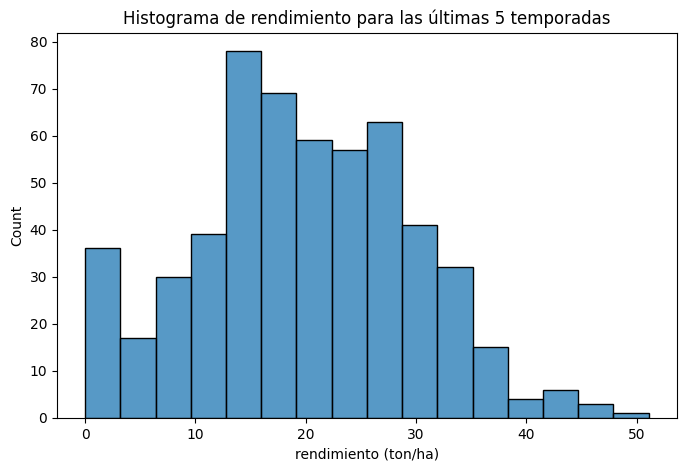

In [ ]:
plt.figure(figsize=(8, 5))
sb.histplot(df, x='rend')
plt.title('Histograma de rendimiento para las últimas 5 temporadas')
plt.xlabel('rendimiento (ton/ha)')
plt.show()

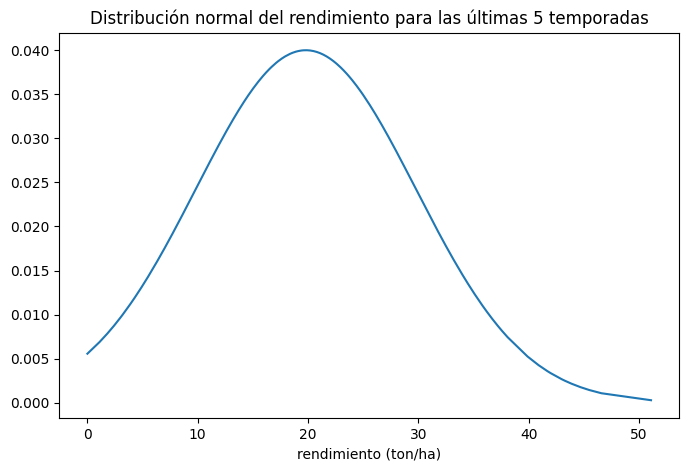

In [ ]:
from scipy.stats import norm
import statistics

# Calculamos media y desviación estandar
mean = statistics.mean(df['rend'])
sd_desv = statistics.stdev(df['rend'])

plt.figure(figsize=(8, 5))
plt.plot(df['rend'].sort_values(ascending=True), norm.pdf(df['rend'].sort_values(ascending=True), mean, sd_desv))
plt.title('Distribución normal del rendimiento para las últimas 5 temporadas')
plt.xlabel('rendimiento (ton/ha)')
plt.show()

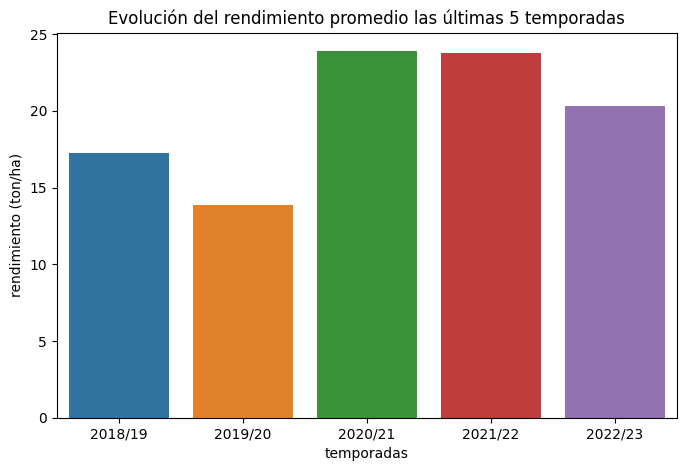

In [ ]:
plt.figure(figsize=(8, 5))
sb.barplot(df, x='temp', y='rend', errorbar=None)
plt.title('Evolución del rendimiento promedio las últimas 5 temporadas')
plt.xlabel('temporadas')
plt.ylabel('rendimiento (ton/ha)')
plt.show()

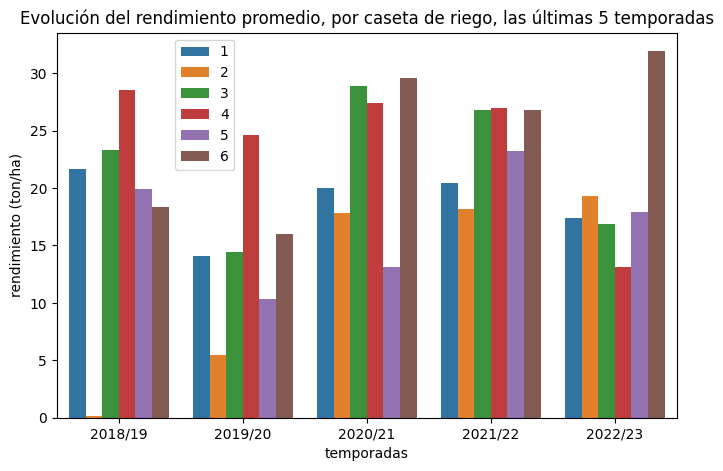

In [ ]:
plt.figure(figsize=(8, 5))
sb.barplot(df, x='temp', y='rend', hue='est', errorbar=None)
plt.title('Evolución del rendimiento promedio, por caseta de riego, las últimas 5 temporadas')
plt.xlabel('temporadas')
plt.ylabel('rendimiento (ton/ha)')
plt.legend(loc='upper left', bbox_to_anchor=(0.18,1))
plt.show()

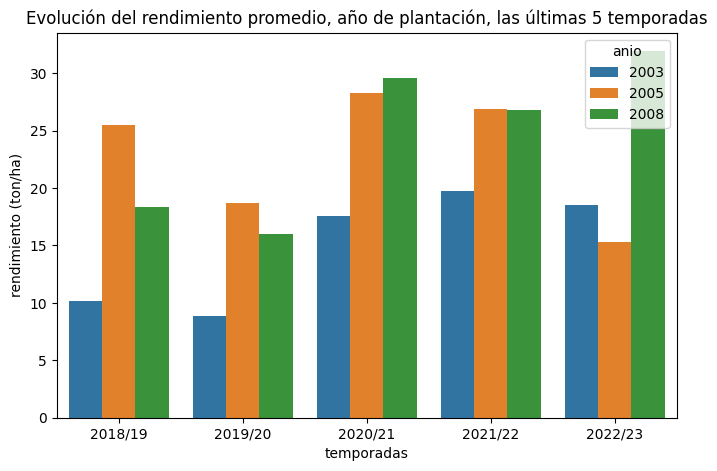

In [ ]:
plt.figure(figsize=(8, 5))
sb.barplot(df, x='temp', y='rend', hue='anio', errorbar=None)
plt.title('Evolución del rendimiento promedio, año de plantación, las últimas 5 temporadas')
plt.xlabel('temporadas')
plt.ylabel('rendimiento (ton/ha)')
plt.show()

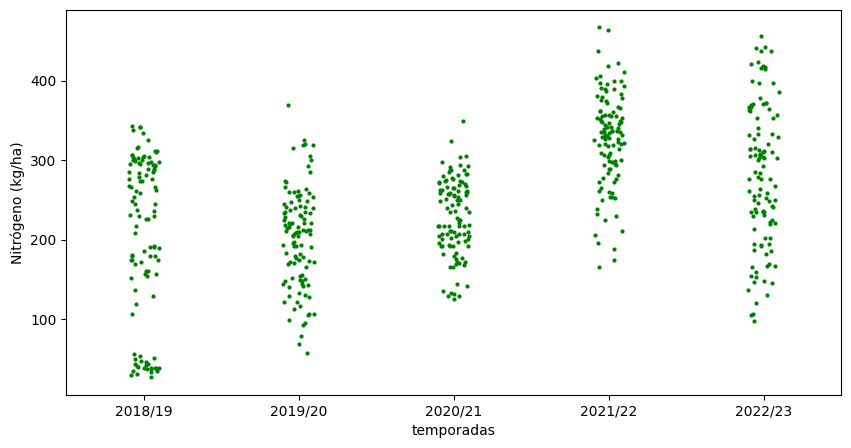

In [ ]:
plt.figure(figsize=(10, 5))
sb.stripplot(df, x='temp', y='N/ha', size=3, color='green')
plt.ylabel('Nitrógeno (kg/ha)')
plt.xlabel('temporadas')
plt.show()

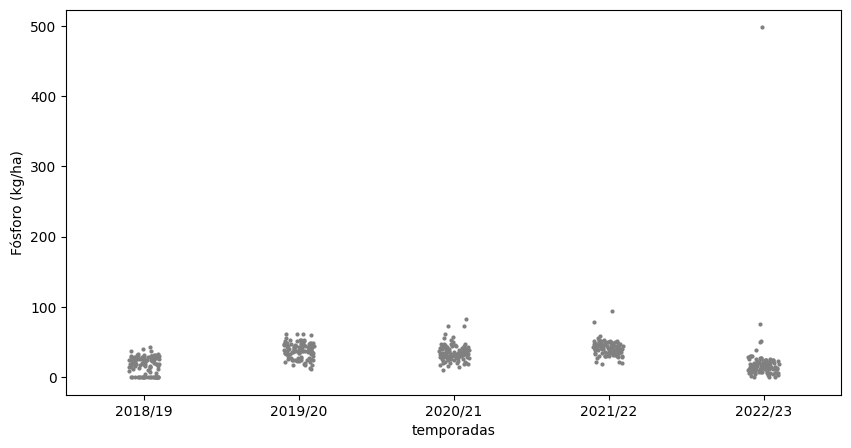

In [ ]:
plt.figure(figsize=(10, 5))
sb.stripplot(df, x='temp', y='P/ha', size=3, color='gray')
plt.ylabel('Fósforo (kg/ha)')
plt.xlabel('temporadas')
plt.show()

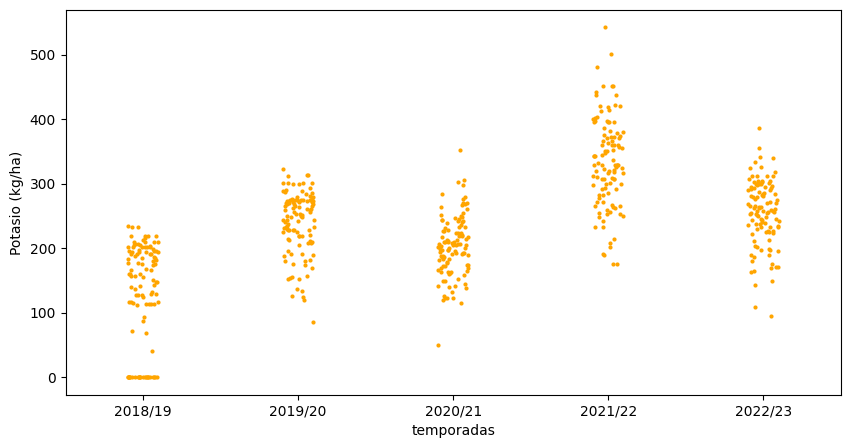

In [ ]:
plt.figure(figsize=(10, 5))
sb.stripplot(df, x='temp', y='K/ha', size=3, color='orange')
plt.ylabel('Potasio (kg/ha)')
plt.xlabel('temporadas')
plt.show()

In [ ]:
df.columns

Index(['Id', 'est', 'edad', 'plts/ha', 'sup', 'sup_geo', 'anio', 'cota',
       'temp', 'N/ha', 'P/ha', 'K/ha', 'Eto', 'dg', 'm3/ha', 'rend'],
      dtype='object')

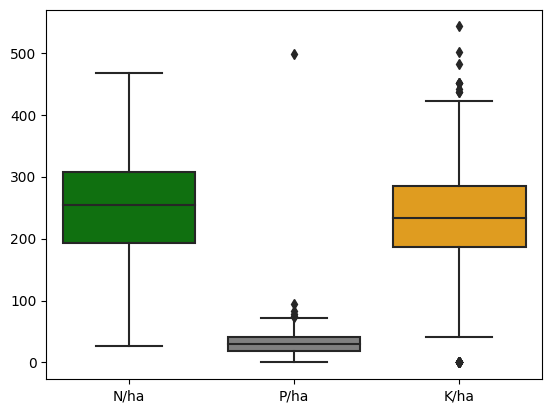

In [ ]:
sb.boxplot(df[['N/ha','P/ha', 'K/ha']], palette=('green', 'gray', 'orange'))
plt.show()

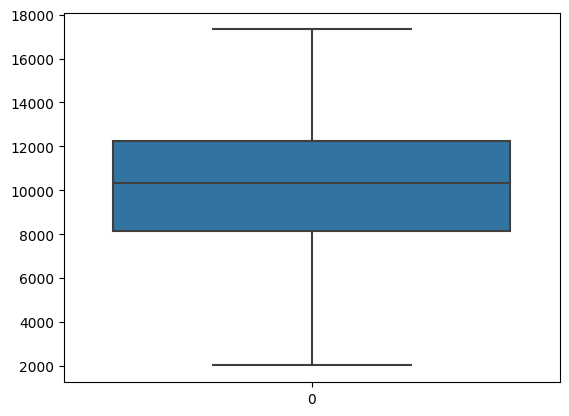

In [ ]:
sb.boxplot(df['m3/ha'])
plt.show()

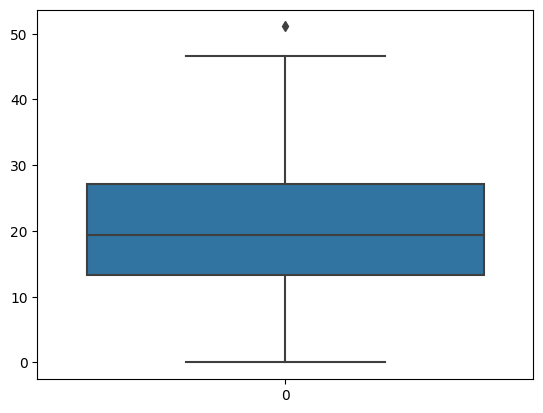

In [ ]:
sb.boxplot(df['rend'])
plt.show()

**Paso sig.:**

> Encontramos valores outliers en las columnas de fósforo/ha, potasio/ha y rendimiento.
> Vamos a eliminarlos utilizando el método IQR

In [ ]:
import numpy as np
import scipy.stats as stats
# definimos un df3 para trabajar sólos las tres columnas donde queremos eliminar valores
df3 = df[['P/ha', 'K/ha', 'N/ha', 'rend']]

# Encontramos el Q1, Q3, y el rango intercuartílico para cada columna
Q1 = df3.quantile(q=.25)
Q3 = df3.quantile(q=.75)
IQR = df3.apply(stats.iqr)

# Solo mantenemos filas que sean menores que 1.5*IQR de Q3
df = df[~((df3 > (Q3+1.5*IQR))).any(axis=1)]

# comprobamos len de df para comprobar eliminación (550 filas originales)
df.shape[0]

534

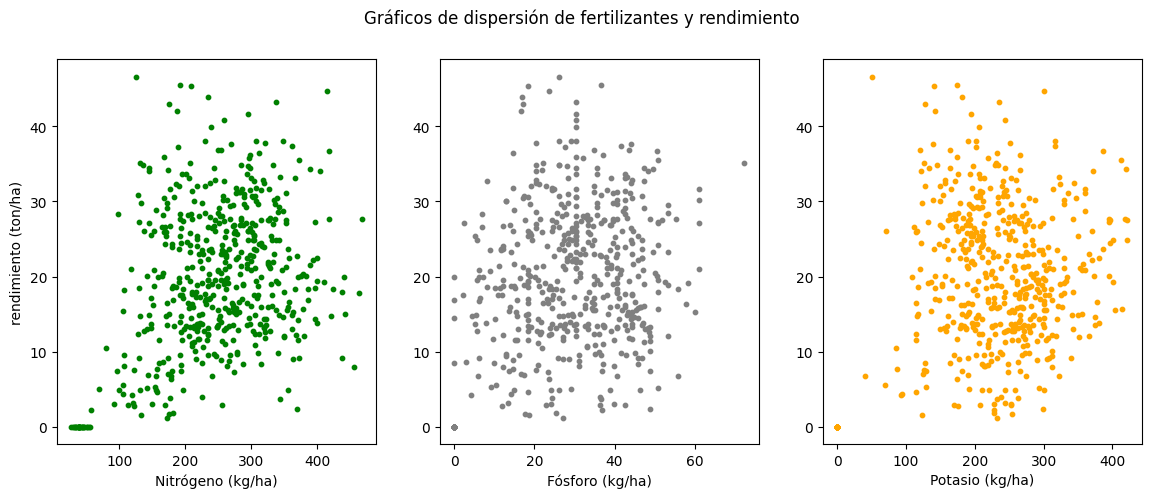

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14, 5), sharey=False)
ax1.scatter(x=df['N/ha'], y=df['rend'], s=10, c='green')
ax2.scatter(x=df['P/ha'], y=df['rend'], s=10, c='gray')
ax3.scatter(x=df['K/ha'], y=df['rend'], s=10, c='orange')
fig.suptitle('Gráficos de dispersión de fertilizantes y rendimiento')
ax1.set_ylabel('rendimiento (ton/ha)')
ax1.set_xlabel('Nitrógeno (kg/ha)')
ax2.set_xlabel('Fósforo (kg/ha)')
ax3.set_xlabel('Potasio (kg/ha)')
plt.show()

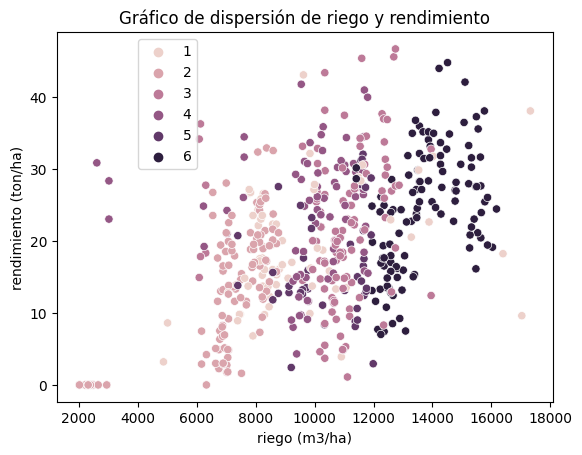

In [ ]:
sb.scatterplot(df, x='m3/ha', y='rend', hue='est')
plt.title('Gráfico de dispersión de riego y rendimiento')
plt.ylabel('rendimiento (ton/ha)')
plt.xlabel('riego (m3/ha)')
plt.legend(loc='upper left', bbox_to_anchor=(0.15,1))
plt.show()

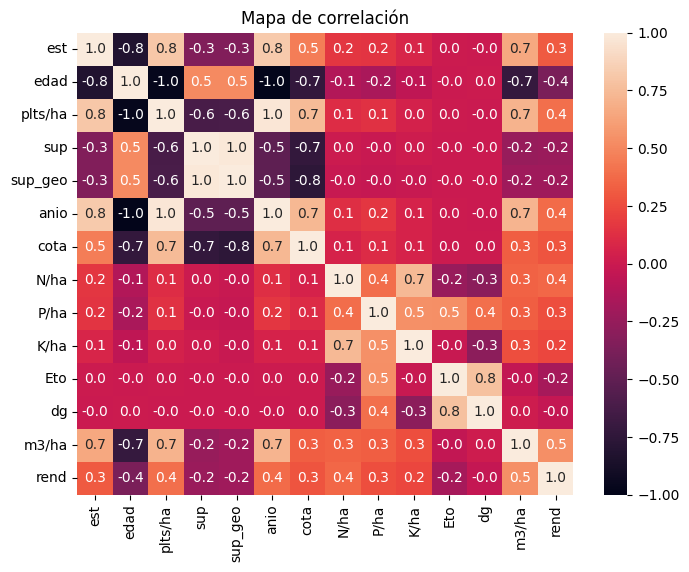

In [ ]:
plt.figure(figsize=(8, 6))
sb.heatmap(df.corr(numeric_only=True), annot=True, fmt=".1f", )
plt.title('Mapa de correlación')
plt.show()

**Obs.:**
> En general, la mayoría de las variables muestran una baja correlación con el target u objetivo ('rend').

> las variables que más se correlacionan con rendimiento, a pesar que hablamos de una correlación media a baja, son:
* la cantidad de agua aplicada (m3/ha) -> 0.5
* la cantidad de nitrógeno aportado (kg/ha) -> 0.4
* el año de plantación o la edad del huerto -> 0.4
* la densidad de plantas/ha -> 0.4

# Parte 4. Desarrollo del Modelo

## Bibliotecas

In [ ]:
#Carga de datos y manipulación de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocesamiento de datos
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

# Modelamiento de datos
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Evaluación de modelos
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Preprocesamiento

**Paso sig.:**
> Elegimos nuestras características y objetivo

> Subdividiremos el conjunto de datos, generaremos subconjuntos para entrenamiento, testeo y validación

>

In [ ]:
# determinamos objetivo y características
y = df['rend']
X = df.drop(columns=['rend', 'Id', 'anio', 'sup'])

# dividimos el dataset y generamos conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(f'Train:',len(X_train), 'filas / Test:',len(X_test),'filas')

Train: 373 filas / Test: 161 filas


**Paso siguiente:**
>*Selecionamos columnas por tipo para pipelines*

>*Instanciamos pipelines con sus imputadores. Utilizaremos un scalador simple para las columnas numéricas, a pesar que ho quedan valores nulos, pero lo dejaremos en caso que aparezcan nuevos datos. Usaremos One Hot encoder para las categóricas, puesto que en este caso las cosetas de riego y las temporadas no tienen mayor diferencia entre sí, ni requieren una ponderación o importancia distinta para el modelo*

>*Armammos las tuplas e instanciamos ColumnTransformer*

>*Ajustamos el transformador en los datos de entrenamiento y transformamos los conjuntos de entrenamiento, test y validación*

In [ ]:
# seleccionamos columnas
num_columns = make_column_selector(dtype_include='number')
cat_columns = make_column_selector(dtype_include='object')

# pipeline para columnas numéricas
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),
                         StandardScaler())
num_pipe

# pipeline para columnas categóricas
cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),
                         OneHotEncoder(handle_unknown='ignore', sparse_output=True))
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
# armamos la tupla para ColumnTransformer
num_tuple = (num_pipe, num_columns)
cat_tuple = (cat_pipe, cat_columns)

# ColumnTransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c735def3970>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7c735def3af0>)])

In [ ]:
# ajustamos o entrenamos el transformador en train
preprocessor.fit(X_train)

# ahora trasnformamos train y test
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

## Evaluación de los modelos

### Lazy Predict

In [ ]:
pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor
lz_reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None, predictions=True)
models,predictions = lz_reg.fit(X_train, X_test, y_train, y_test)
models.sort_values('R-Squared', ascending=False).reset_index()
models.head(10)

100%|██████████| 42/42 [00:03<00:00, 11.94it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 373, number of used features: 16
[LightGBM] [Info] Start training from score 19.324324
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.48,0.53,6.82,0.27
RandomForestRegressor,0.48,0.53,6.85,0.30
LGBMRegressor,0.46,0.51,6.97,0.10
KNeighborsRegressor,0.46,0.51,6.97,0.01
BaggingRegressor,0.44,0.50,7.07,0.07
HistGradientBoostingRegressor,0.43,0.49,7.14,0.48
AdaBoostRegressor,0.42,0.48,7.20,0.17
SVR,0.42,0.48,7.21,0.02
ExtraTreesRegressor,0.39,0.45,7.40,0.31


### Modelos

#### Gradient Boost



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}


#aplicamos GridSearch para buscar la mejor combinación de parámetros
grid_gb = GridSearchCV(GradientBoostingRegressor(),
                       param_grid_gb,
                       refit=True,
                       verbose=2,
                       cv=3)
grid_gb.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=2)

In [ ]:
grid_gb.best_params_
best_params_gb = grid_gb.best_params_
best_params_gb

{'learning_rate': 0.01,
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'subsample': 0.8}

In [ ]:
# volvemos a correr el modelo, esta vez ajustado a los mejores parámetros encontrados
gb = GradientBoostingRegressor(**best_params_gb)
gb.fit(X_train,y_train)

y_pred_gb = gb.predict(X_test)

print(f"r2: {r2_score(y_test,y_pred_gb).round(2)}")
print(f"MAE: {mean_absolute_error(y_test,y_pred_gb).round(2)}")
print(f"MSE: {mean_squared_error(y_test,y_pred_gb).round(1)}")
print(f"RMSE is: {np.sqrt(mean_squared_error(y_test,y_pred_gb)).round(1)}")

r2: 0.58
MAE: 4.9
MSE: 42.0
RMSE is: 6.5


#### KNNeighbors

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'leaf_size': [15, 30, 45]
}


#aplicamos GridSearch para buscar la mejor combinación de parámetros
grid_knn = GridSearchCV(KNeighborsRegressor(),
                       param_grid_knn,
                       refit=True,
                       verbose=2,
                       cv=3)
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END leaf_size=15, metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END leaf_size=15, metric=euclidean, n_neighbors=5, weights=distance; total time=   0.1s
[CV] END leaf_

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [15, 30, 45],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [ ]:
grid_knn.best_params_
best_params_knn = grid_knn.best_params_
best_params_knn

{'leaf_size': 15,
 'metric': 'manhattan',
 'n_neighbors': 9,
 'weights': 'distance'}

In [ ]:
# volvemos a correr el modelo, esta vez ajustado a los mejores parámetros encontrados
KN = KNeighborsRegressor(**best_params_knn)
KN.fit(X_train,y_train)

y_pred_KN = KN.predict(X_test)

print(f"r2: {r2_score(y_test,y_pred_KN).round(2)}")
print(f"MAE: {mean_absolute_error(y_test,y_pred_KN).round(2)}")
print(f"MSE: {mean_squared_error(y_test,y_pred_KN).round(1)}")
print(f"RMSE is: {np.sqrt(mean_squared_error(y_test,y_pred_KN)).round(1)}")

r2: 0.54
MAE: 5.0
MSE: 46.1
RMSE is: 6.8


####Random Forest

In [ ]:
#importamos el modelo
from sklearn.ensemble import RandomForestRegressor

params_rf = {
    'n_estimators':[10, 50, 100, 200, 500],
    'max_depth':[10, 20, 30,],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2']}

#aplicamos GridSearch para buscar la mejor combinación de parámetros
grid_rf = GridSearchCV(RandomForestRegressor(),
                     params_rf,
                     refit=True,
                     verbose=2,
                     cv=3)
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 810 candidates, totalling 2430 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total tim

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200, 500]},
             verbose=2)

In [ ]:
# obtenemos los mejores parámetros desde GridSearch
best_params_rf = grid_rf.best_params_
best_params_rf

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 50}

In [ ]:
# volvemos a correr el modelo, esta vez ajustado
# a los mejores parámetros encontrados
rf = RandomForestRegressor(**best_params_rf)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

print(f"R2 Score is: {r2_score(y_test,y_pred_rf)}")
print(f"MAE is: {mean_absolute_error(y_test,y_pred_rf)}")
print(f"MSE is: {mean_squared_error(y_test,y_pred_rf)}")
print(f"RMSE is: {np.sqrt(mean_squared_error(y_test,y_pred_rf)).round(1)}")

R2 Score is: 0.5720752245093822
MAE is: 4.939830197387919
MSE is: 42.703979868122154
RMSE is: 6.5


#### LGBM

In [ ]:
from lightgbm import LGBMRegressor

param_grid_lgbm = {'learning_rate': [0.01, 0.1, 0.2],
                   'n_estimators': [40, 100, 200],
                   'num_leaves': [31, 127, 255],
                   'boosting_type' : ['gbdt', 'dart'],
                   'objective' : ['regression'],
                   'max_depth' : [5, 10, 15],
                   'random_state' : [501],
                   'colsample_bytree' : [0.5, 0.7, 1.0],
                   'subsample' : [0.5, 0.7, 1.0],
                   'reg_alpha' : [0.01, 0.1, 1],
                   'reg_lambda' : [0.01, 0.1, 1]}

#aplicamos GridSearch para buscar la mejor combinación de parámetros
grid_lgbm = GridSearchCV(LGBMRegressor(random_state=42),
                     param_grid_lgbm,
                     refit=True,
                     verbose=2,
                     cv=3)
grid_lgbm.fit(X_train, y_train)

y_pred_lgbm = grid_lgbm.predict(X_test)

Se han truncado las últimas 5000 líneas del flujo de salida.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END boosting_type=dart, colsample_bytree=1.0, learning_rate=0.2, max_depth=15, n_estimators=200, num_leaves=255, objective=regression, random_state=501, reg_alpha=1, reg_lambda=0.01, subsample=0.5; total time=   0.2s
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 248, number of used features: 16
[LightGBM] [Info] Start training from score 19.921847

In [ ]:
# obtenemos los mejores parámetros desde GridSearch
best_params_lgbm = grid_lgbm.best_params_
best_params_lgbm

{'boosting_type': 'gbdt',
 'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 40,
 'num_leaves': 31,
 'objective': 'regression',
 'random_state': 501,
 'reg_alpha': 0.1,
 'reg_lambda': 1,
 'subsample': 0.5}

In [ ]:
# volvemos a correr el modelo, esta vez ajustado
# a los mejores parámetros encontrados
lgbm = LGBMRegressor(**best_params_lgbm)
lgbm.fit(X_train,y_train)

y_pred_lgbm = lgbm.predict(X_test)

print(f"R2 Score is: {r2_score(y_test,y_pred_lgbm)}")
print(f"MAE is: {mean_absolute_error(y_test,y_pred_lgbm)}")
print(f"MSE is: {mean_squared_error(y_test,y_pred_lgbm)}")
print(f"RMSE is: {np.sqrt(mean_squared_error(y_test,y_pred_lgbm)).round(1)}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 551
[LightGBM] [Info] Number of data points in the train set: 373, number of used features: 16
[LightGBM] [Info] Start training from score 19.324324
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [ ]:
results = pd.DataFrame(columns=['GradientBoost', 'KNeighbors', 'RandomForest', 'LGBM'],
                  index=['r2', 'MAE', 'MSE', 'RMSE'])

results.iloc[0] = (r2_score(y_test,y_pred_gb).round(2),
                   r2_score(y_test,y_pred_KN).round(2),
                   r2_score(y_test,y_pred_rf).round(2),
                   r2_score(y_test,y_pred_lgbm).round(2))
results.iloc[1] = (mean_absolute_error(y_test,y_pred_gb).round(2),
                   mean_absolute_error(y_test,y_pred_KN).round(2),
                   mean_absolute_error(y_test,y_pred_rf).round(2),
                   mean_absolute_error(y_test,y_pred_lgbm).round(2))
results.iloc[2] = (mean_squared_error(y_test,y_pred_gb).round(1),
                   mean_squared_error(y_test,y_pred_KN).round(1),
                   mean_squared_error(y_test,y_pred_rf).round(1),
                   mean_squared_error(y_test,y_pred_lgbm).round(1))
results.iloc[3] = (np.sqrt(mean_squared_error(y_test,y_pred_gb)).round(1),
                   np.sqrt(mean_squared_error(y_test,y_pred_KN)).round(1),
                   np.sqrt(mean_squared_error(y_test,y_pred_rf)).round(1),
                   np.sqrt(mean_squared_error(y_test,y_pred_lgbm)).round(1))
results

,GradientBoost,KNeighbors,RandomForest,LGBM
r2,0.58,0.54,0.57,0.54
MAE,4.90,5.00,4.94,5.16
MSE,42.00,46.10,42.70,45.90
RMSE,6.50,6.80,6.50,6.80
